In [1]:
import pandas as pd

In [2]:
path = "/home/juanbetancur/analisis_datos_universidad/evento_evaluativo_4/ejercicio_3/amazon_review_lemmatized.parquet"
df = pd.read_parquet(path, engine="pyarrow")

In [3]:
df.head()


,rating,clean_title,clean_review,clean_review_stemming,clean_review_lemmatization
0,3,more like funchuck,gave this to my dad for a gag gift after direc...,gave dad gag gift direct nunsens got reall kick,give dad gag gift direct nunsense get reall kick
1,5,inspiring,i hope a lot of people hear this cd we need mo...,hope lot peopl hear cd need strong posit vibe ...,hope lot people hear cd need strong positive v...
2,5,the best soundtrack ever to anything,im reading a lot of reviews saying that this i...,im read lot review say best game soundtrack fi...,read lot review say good game soundtrack figur...
3,4,chrono cross ost,the music of yasunori misuda is without questi...,music yasunori misuda without question close s...,music yasunori misuda without question close s...
4,5,too good to be true,probably the greatest soundtrack in history us...,probabl greatest soundtrack histori usual bett...,probably great soundtrack history usually well...


In [4]:
#dataset nuevo con el 10% de los datos pero por cada califacacion.
df_sampled = df.groupby('rating').apply(lambda x: x.sample(frac=0.1, random_state=42)).reset_index(drop=True)
df_sampled.head()

/tmp/ipykernel_10596/3055708172.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('rating').apply(lambda x: x.sample(frac=0.1, random_state=42)).reset_index(drop=True)


,rating,clean_title,clean_review,clean_review_stemming,clean_review_lemmatization
0,1,useless junk,i thought this would be a nifty gadget safer t...,thought would nifti gadget safer knife easier ...,think would nifty gadget safe knife easy use s...
1,1,poor quality cord light,i purchased one of these in the length and af...,purchas one length year light duti home garag ...,purchase one length year light duty home g...
2,1,i would give it no stars if i could,i bought this book looking for fun things to d...,bought book look fun thing date serious doubt ...,buy book look fun thing date seriously doubt a...
3,1,this program is flawed,this program has a lot of bugs in it it has th...,program lot bug tendenc crash system addit ans...,program lot bug tendency crash system addition...
4,1,sending it back,i too was disappointed in my set i thought it ...,disappoint set thought would wood open saw car...,disappoint set think would wood open see cardb...


In [ ]:
#contar cunatos registros hay por cada calificacion
df_sampled['rating'].value_counts()

rating
2    72757
3    72643
1    72626
4    72566
5    72352
Name: count, dtype: int64

In [6]:
df_sampled.to_parquet("/home/juanbetancur/analisis_datos_universidad/evento_evaluativo_4/ejercicio_3/amazon_review_lemmatized_sampled.parquet", engine="pyarrow")   

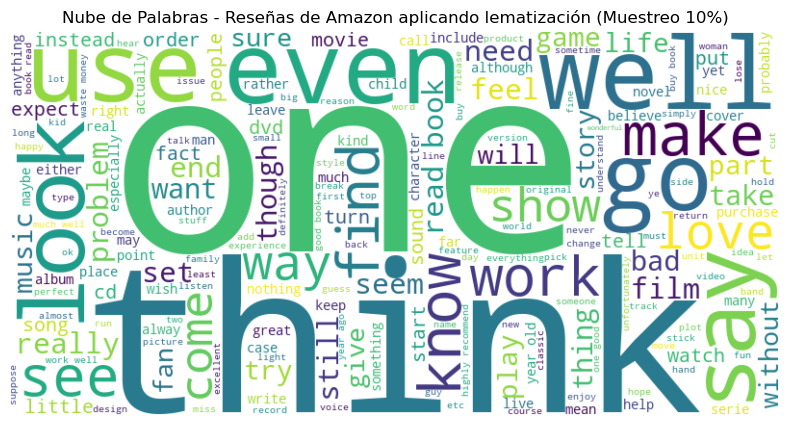

In [ ]:
# nube de palabras con la columna clean_review_lemmatization del dataset muestreado
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(review for review in df_sampled.clean_review_lemmatization) 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.title("Nube de Palabras - Reseñas de Amazon aplicando lematización (Muestreo 10%)")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()